In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import ttest_ind

# LBP 통계값

In [2]:
normal_img = cv2.imread('/Users/raphaelseo/Documents/projects/SPH/og_data/normal/202201252341184-dry-asphalt-smooth.jpg', cv2.IMREAD_GRAYSCALE)
normal_lbp = local_binary_pattern(normal_img, 24, 3, method='uniform')

In [3]:
# Calculate LBP statistics for normal image
normal_lbp_hist, _ = np.histogram(normal_lbp.ravel(), bins=np.arange(0, 27), range=(0, 26))

# Normalize the histogram
normal_lbp_hist = normal_lbp_hist.astype("float")
normal_lbp_hist /= (normal_lbp_hist.sum() + 1e-7)

# Calculate basic statistics
normal_lbp_mean = np.mean(normal_lbp)
normal_lbp_std = np.std(normal_lbp)
normal_lbp_median = np.median(normal_lbp)

# Calculate entropy
normal_lbp_entropy = -np.sum(normal_lbp_hist * np.log2(normal_lbp_hist + 1e-7))

# Print the results for normal image
print("Normal LBP Histogram:", normal_lbp_hist)
print("Normal LBP Mean:", normal_lbp_mean)
print("Normal LBP Standard Deviation:", normal_lbp_std)
print("Normal LBP Median:", normal_lbp_median)
print("Normal LBP Entropy:", normal_lbp_entropy)


Normal LBP Histogram: [0.0872338  0.0359838  0.03483796 0.02443287 0.01252315 0.00767361
 0.00528935 0.00424769 0.00342593 0.00298611 0.00260417 0.00274306
 0.00265046 0.00489583 0.0028125  0.00480324 0.00342593 0.00533565
 0.00652778 0.00856481 0.01405093 0.02636574 0.03601852 0.03336806
 0.0859375  0.54126157]
Normal LBP Mean: 19.060625
Normal LBP Standard Deviation: 9.461491424703896
Normal LBP Median: 25.0
Normal LBP Entropy: 2.724841769704676


## LBP 통계값 연산 및 비교

In [5]:
def get_lbp_statistics(folder_path):
    entropies = []
    means = []
    medians = []
    stds = []
    file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    for path in file_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        try:
            if len(img.shape) == 3:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        except:
            print(f"Error processing image: {path}")
            break
        lbp = local_binary_pattern(img, 24, 3, method='default')
        # Calculate LBP statistics
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 27), range=(0, 26))

        # Normalize the histogram
        lbp_hist = lbp_hist.astype("float")
        lbp_hist /= (lbp_hist.sum() + 1e-7)

        # Calculate entropy
        lbp_entropy = -np.sum(lbp_hist * np.log2(lbp_hist + 1e-7))
        entropies.append(lbp_entropy)

        # Calculate mean, median, and standard deviation
        lbp_mean = np.mean(lbp)
        lbp_median = np.median(lbp)
        lbp_std = np.std(lbp)

        means.append(lbp_mean)
        medians.append(lbp_median)
        stds.append(lbp_std)

    return {
        'entropy': entropies,
        'mean': means,
        'median': medians,
        'std': stds
    }


In [6]:
normal_lbp_statistics = get_lbp_statistics('/Users/raphaelseo/Documents/projects/SPH/og_data/normal')
crack_lbp_statistics = get_lbp_statistics('/Users/raphaelseo/Documents/projects/SPH/og_data/crack')

print(normal_lbp_statistics)
print(crack_lbp_statistics)

{'entropy': [1.52924434145798, 1.3778283677080663, 1.3473361033396927, 1.4875423483007644, 1.5624238560344323, 1.3704805363529726, 1.3474668250564965, 1.471451936395264, 1.3557809924677688, 1.3093717939686238, 1.2850356403091117, 1.4122191645982702, 1.2364242102951395, 1.3073782773538694, 1.5167510735632417, 1.3219153934295544, 1.400073209855685, 1.3225101655868756, 1.2907703880214134, 1.431504438751508, 1.3524389561132972, 1.4972815478740629, 1.3598142752733826, 1.4000740358145247, 1.3928540274676255, 1.4118369775268573, 1.3302533747997036, 1.475678859460199, 1.5041882178366217, 1.335365697734726, 1.609763221254154, 1.3075949358512613, 1.4567104751136541, 1.307835883288189, 1.3437185156597768, 1.4432955483134209, 1.2721558377577529, 1.3772639595626355, 1.402876061947189, 1.2509744120160409, 1.4728050999998503, 1.4459728664948577, 1.3739674037682992, 1.357154214758152, 1.361930892184115, 1.5481546740656726, 1.3698358322985642, 1.370525452913179, 1.2680709258929816, 1.5393275683714323, 

In [7]:
for k in normal_lbp_statistics.keys():
    print(f"{k}: {ttest_ind(normal_lbp_statistics[k], crack_lbp_statistics[k])}")

entropy: TtestResult(statistic=-11.487670467245305, pvalue=9.77668388918627e-24, df=198.0)
mean: TtestResult(statistic=-2.384192666066312, pvalue=0.01806116945468969, df=198.0)
median: TtestResult(statistic=1.011072952033482, pvalue=0.3132154726260097, df=198.0)
std: TtestResult(statistic=3.9047831900445233, pvalue=0.00012930143264763483, df=198.0)


### LBP 통계값의 평균비교
- 엔트로피 값 비교
  - 엔트로피 값의 경우 매우 낮은 p-value를 보여주므로 두 집단간 통계적으로 유의미한 차이를 보여주고 있습니다.
- 평균 값 비교
  - 평균 값의 경우 낮은 p-value를 보여주므로 두 집단간 통계적으로 유의미한 차이를 보여주고 있습니다.
- 중앙값 비교
  - 중앙값의 경우 0.05 이상의 p-value를 보여주므로 두 집단간 통계적으로 유의미한 차이가 존재하지 않는다고 판단됩니다.
- 표준편차 비교
  - 표준편차의 경우 매우 낮은 p-value를 보여주므로 두 집단간 통계적으로 유의미한 차이를 보여주고 있습니다.

- 따라서 두 집단을 분류하는데 사용할 수 있는 지표로는 엔트로피, 평균, 표준편차가 사용될 수 있습니다.

## 각 지표별 분류 성능 계산

### Entropy

In [8]:
def classify_images_with_lbp_entropy(normal_entropy, crack_entropy):
    # Prepare the data
    X = np.concatenate([normal_entropy, crack_entropy])
    y = np.array([0] * len(normal_entropy) + [1] * len(crack_entropy))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the data for sklearn (it expects 2D array)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with your LBP entropy data
classify_images_with_lbp_entropy(normal_lbp_statistics['entropy'], crack_lbp_statistics['entropy'])


Accuracy: 0.7
F1 Score: 0.6842105263157895


### Mean

In [9]:
def get_lbp_mean(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    return np.mean(lbp)

def classify_images_with_lbp_mean(normal_dir, crack_dir):
    normal_lbp_means = []
    crack_lbp_means = []

    for img in os.listdir(normal_dir):
        lbp_mean = get_lbp_mean(os.path.join(normal_dir, img))
        normal_lbp_means.append(lbp_mean)

    for img in os.listdir(crack_dir):
        lbp_mean = get_lbp_mean(os.path.join(crack_dir, img))
        crack_lbp_means.append(lbp_mean)

    X = np.array(normal_lbp_means + crack_lbp_means).reshape(-1, 1)
    y = np.array([0] * len(normal_lbp_means) + [1] * len(crack_lbp_means))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with your image directories
normal_dir = '/Users/raphaelseo/Documents/projects/SPH/og_data/normal'
crack_dir = '/Users/raphaelseo/Documents/projects/SPH/og_data/crack'
classify_images_with_lbp_mean(normal_dir, crack_dir)


Accuracy: 0.5
F1 Score: 0.47368421052631576


### Std

In [10]:
def get_lbp_std(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    return np.std(lbp)

def classify_images_with_lbp_std(normal_dir, crack_dir):
    normal_lbp_std = []
    crack_lbp_std = []

    for img in os.listdir(normal_dir):
        lbp_mean = get_lbp_std(os.path.join(normal_dir, img))
        normal_lbp_std.append(lbp_mean)

    for img in os.listdir(crack_dir):
        lbp_mean = get_lbp_std(os.path.join(crack_dir, img))
        crack_lbp_std.append(lbp_mean)

    X = np.array(normal_lbp_std + crack_lbp_std).reshape(-1, 1)
    y = np.array([0] * len(normal_lbp_std) + [1] * len(crack_lbp_std))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with your image directories
normal_dir = '/Users/raphaelseo/Documents/projects/SPH/og_data/normal'
crack_dir = '/Users/raphaelseo/Documents/projects/SPH/og_data/crack'
classify_images_with_lbp_std(normal_dir, crack_dir)


Accuracy: 0.675
F1 Score: 0.6976744186046512


### Entropy & Std

In [11]:
def get_lbp_entropy_std(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    
    # Calculate entropy
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    entropy = -np.sum(hist * np.log2(hist + 1e-7))
    
    # Calculate standard deviation
    std = np.std(lbp)
    
    return entropy, std

def classify_images_with_lbp_entropy_std(normal_dir, crack_dir):
    normal_features = []
    crack_features = []

    for img in os.listdir(normal_dir):
        entropy, std = get_lbp_entropy_std(os.path.join(normal_dir, img))
        normal_features.append([entropy, std])

    for img in os.listdir(crack_dir):
        entropy, std = get_lbp_entropy_std(os.path.join(crack_dir, img))
        crack_features.append([entropy, std])

    X = np.array(normal_features + crack_features)
    y = np.array([0] * len(normal_features) + [1] * len(crack_features))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with your image directories
normal_dir = '/Users/raphaelseo/Documents/projects/SPH/og_data/normal'
crack_dir = '/Users/raphaelseo/Documents/projects/SPH/og_data/crack'
classify_images_with_lbp_entropy_std(normal_dir, crack_dir)

Accuracy: 0.75
F1 Score: 0.7222222222222222


### Entropy & Mean & Std

In [12]:
def get_lbp_entropy_mean_std(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    
    # Calculate entropy
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    entropy = -np.sum(hist * np.log2(hist + 1e-7))
    
    # Calculate mean and standard deviation
    mean = np.mean(lbp)
    std = np.std(lbp)
    
    return entropy, mean, std

def classify_images_with_lbp_entropy_mean_std(normal_dir, crack_dir):
    normal_features = []
    crack_features = []

    for img in os.listdir(normal_dir):
        entropy, mean, std = get_lbp_entropy_mean_std(os.path.join(normal_dir, img))
        normal_features.append([entropy, mean, std])

    for img in os.listdir(crack_dir):
        entropy, mean, std = get_lbp_entropy_mean_std(os.path.join(crack_dir, img))
        crack_features.append([entropy, mean, std])

    X = np.array(normal_features + crack_features)
    y = np.array([0] * len(normal_features) + [1] * len(crack_features))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with your image directories
normal_dir = '/Users/raphaelseo/Documents/projects/SPH/og_data/normal'
crack_dir = '/Users/raphaelseo/Documents/projects/SPH/og_data/crack'
classify_images_with_lbp_entropy_mean_std(normal_dir, crack_dir)


Accuracy: 0.7
F1 Score: 0.6842105263157895


# GLCM 특성
- 0도, 45도, 90도, 135도 각도 각각에 대해 특성값을 계산하였습니다.
- 이는 방향성을 고려한여 다양한 방향의 텍스처 특성을 확인할 수 있습니다.
- 위에서 사용한 각도는 일반적으로 glcm 분석을 진행할 때 사용되는 각도입니다.

## GLCM 특성 평균 연산 및 비교
- 0도, 45도, 90도, 135도 각도 각각에 대해 특성값을 계산하고 계산한 값의 평균을 사용하였습니다.

In [13]:
def calculate_glcm_features(folder_path, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
    contrast = []
    dissimilarity = []
    homogeneity = []
    energy = []
    correlation = []
    file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    for path in file_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        try:
            if len(img.shape) == 3:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        except:
            print(f"Error processing image: {path}")
            break
        glcm = graycomatrix(img, distances=distances, angles=angles, symmetric=True, normed=True)
        
        # Calculate GLCM properties
        contrast.append(np.mean(graycoprops(glcm, 'contrast')))
        dissimilarity.append(np.mean(graycoprops(glcm, 'dissimilarity')))
        homogeneity.append(np.mean(graycoprops(glcm, 'homogeneity')))
        energy.append(np.mean(graycoprops(glcm, 'energy')))
        correlation.append(np.mean(graycoprops(glcm, 'correlation')))
        
    # Average the features over all angles
    features = {
        '대비': contrast,
        '비유사성': dissimilarity,
        '동질성': homogeneity,
        '균일성': energy,
        '상관성': correlation
    }
    
    return features



In [14]:
normal_glcm_features = calculate_glcm_features('/Users/raphaelseo/Documents/projects/SPH/og_data/normal')
crack_glcm_features = calculate_glcm_features('/Users/raphaelseo/Documents/projects/SPH/og_data/crack')

In [15]:
for k in normal_glcm_features.keys():
    print(f"{k}: {ttest_ind(normal_glcm_features[k], crack_glcm_features[k])}")

대비: TtestResult(statistic=-0.9520038676883149, pvalue=0.3422557040530948, df=198.0)
비유사성: TtestResult(statistic=2.2602605128154365, pvalue=0.024893385979268285, df=198.0)
동질성: TtestResult(statistic=-7.537720320012255, pvalue=1.6783070112145846e-12, df=198.0)
균일성: TtestResult(statistic=-8.16420829234819, pvalue=3.723000612656828e-14, df=198.0)
상관성: TtestResult(statistic=-2.3212567562882747, pvalue=0.02129064773491552, df=198.0)


### GLCM 특성 평균 비교
- 평균 대비(contrast) 비교
  - P-value가 0.05 이상이므로 통계적으로 유의미한 차이를 보이지 않는다고 판단됩니다.
- 평균 비유사성(dissimilarity) 비교
  - P-value가 0.05 이하이므로 통계적으로 유의미한 차이를 보이고 있습니다.
- 평균 동질성(homogeneity) 비교
  - P-value가 0.05 이하이므로 통계적으로 유의미한 차이를 보이고 있습니다.
- 평균 균일성(energy) 비교
  - P-value가 0.05 이하이므로 통계적으로 유의미한 차이를 보이고 있습니다.
- 평균 상관성(correlation) 비교
  - P-value가 0.05 이하이므로 통계적으로 유의미한 차이를 보이고 있습니다.

- 따라서 두 집단을 분류하는데 비유사성, 동질성, 균일성, 상관성이 사용될 수 있습니다.
  - 하지만 동질성과 균일성이 다른 특성들에 비해 많이 작은 P-value를 보여주기 때문에 우선적으로 고려합니다.

## 각 특성별 분류 모델 생성

### Homogeneity

In [16]:
def classify_images_with_glcm_homogeneity(normal_homogeneity, crack_homogeneity):
    # Prepare the data
    X = np.concatenate([normal_homogeneity, crack_homogeneity])
    y = np.array([0] * len(normal_homogeneity) + [1] * len(crack_homogeneity))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the data for sklearn (it expects 2D array)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM homogeneity features
normal_homogeneity = normal_glcm_features['동질성']
crack_homogeneity = crack_glcm_features['동질성']
classify_images_with_glcm_homogeneity(normal_homogeneity, crack_homogeneity)

Accuracy: 0.5
F1 Score: 0.5


### Energy

In [17]:
def classify_images_with_glcm_energy(normal_energy, crack_energy):
    # Prepare the data
    X = np.concatenate([normal_energy, crack_energy])
    y = np.array([0] * len(normal_energy) + [1] * len(crack_energy))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the data for sklearn (it expects 2D array)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM energy features
normal_energy = normal_glcm_features['균일성']
crack_energy = crack_glcm_features['균일성']
classify_images_with_glcm_energy(normal_energy, crack_energy)


Accuracy: 0.625
F1 Score: 0.6511627906976745


### Dissimilarity

In [18]:
def classify_images_with_glcm_dissimilarity(normal_dissimilarity, crack_dissimilarity):
    # Prepare the data
    X = np.concatenate([normal_dissimilarity, crack_dissimilarity])
    y = np.array([0] * len(normal_dissimilarity) + [1] * len(crack_dissimilarity))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the data for sklearn (it expects 2D array)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM dissimilarity features
normal_dissimilarity = normal_glcm_features['비유사성']
crack_dissimilarity = crack_glcm_features['비유사성']
classify_images_with_glcm_dissimilarity(normal_dissimilarity, crack_dissimilarity)


Accuracy: 0.6
F1 Score: 0.6190476190476191


### Correlation

In [19]:
def classify_images_with_glcm_correlation(normal_correlation, crack_correlation):
    # Prepare the data
    X = np.concatenate([normal_correlation, crack_correlation])
    y = np.array([0] * len(normal_correlation) + [1] * len(crack_correlation))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the data for sklearn (it expects 2D array)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM correlation features
normal_correlation = normal_glcm_features['상관성']
crack_correlation = crack_glcm_features['상관성']
classify_images_with_glcm_correlation(normal_correlation, crack_correlation)



Accuracy: 0.575
F1 Score: 0.6046511627906976


### Homogeneity & Energy

In [20]:
def classify_images_with_glcm_homogeneity_energy(normal_homogeneity, normal_energy, crack_homogeneity, crack_energy):
    # Prepare the data
    X = np.concatenate([
        np.column_stack((normal_homogeneity, normal_energy)),
        np.column_stack((crack_homogeneity, crack_energy))
    ])
    y = np.array([0] * len(normal_homogeneity) + [1] * len(crack_homogeneity))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM homogeneity and ASM features
normal_homogeneity = normal_glcm_features['동질성']
normal_energy= normal_glcm_features['균일성']
crack_homogeneity = crack_glcm_features['동질성']
crack_energy = crack_glcm_features['균일성']
classify_images_with_glcm_homogeneity_energy(normal_homogeneity, normal_energy, crack_homogeneity, crack_energy)


Accuracy: 0.6
F1 Score: 0.6


### Energy & Correlation

In [21]:
def classify_images_with_glcm_energy_correlation(normal_energy, normal_correlation, crack_energy, crack_correlation):
    # Prepare the data
    X = np.concatenate([
        np.column_stack((normal_energy, normal_correlation)),
        np.column_stack((crack_energy, crack_correlation))
    ])
    y = np.array([0] * len(normal_energy) + [1] * len(crack_energy))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM energy and correlation features
normal_energy = normal_glcm_features['균일성']
normal_correlation = normal_glcm_features['상관성']
crack_energy = crack_glcm_features['균일성']
crack_correlation = crack_glcm_features['상관성']
classify_images_with_glcm_energy_correlation(normal_energy, normal_correlation, crack_energy, crack_correlation)

Accuracy: 0.725
F1 Score: 0.717948717948718


### Homogeneity & Energy & Correlation

In [22]:
def classify_images_with_glcm_homogeneity_energy_correlation(normal_homogeneity, normal_energy, normal_correlation, crack_homogeneity, crack_energy, crack_correlation):
    # Prepare the data
    X = np.concatenate([
        np.column_stack((normal_homogeneity, normal_energy, normal_correlation)),
        np.column_stack((crack_homogeneity, crack_energy, crack_correlation))
    ])
    y = np.array([0] * len(normal_homogeneity) + [1] * len(crack_homogeneity))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM homogeneity, ASM, and correlation features
normal_homogeneity = normal_glcm_features['동질성']
normal_energy = normal_glcm_features['균일성']
normal_correlation = normal_glcm_features['상관성']
crack_homogeneity = crack_glcm_features['동질성']
crack_energy = crack_glcm_features['균일성']
crack_correlation = crack_glcm_features['상관성']
classify_images_with_glcm_homogeneity_energy_correlation(normal_homogeneity, normal_energy, normal_correlation, crack_homogeneity, crack_energy, crack_correlation)


Accuracy: 0.65
F1 Score: 0.6666666666666666


## GLCM 통계값 표준편차 연산 및 비교
- 0도, 45도, 90도, 135도 각도 각각에 대해 특성값을 계산하고 계산한 값의 표준편차를 사용하였습니다.

In [23]:
def classify_images_with_glcm_features(normal_homogeneity, normal_energy, normal_correlation, normal_dissimilarity,
                                       crack_homogeneity, crack_energy, crack_correlation, crack_dissimilarity):
    # Prepare the data
    X = np.concatenate([
        np.column_stack((normal_homogeneity, normal_energy, normal_correlation, normal_dissimilarity)),
        np.column_stack((crack_homogeneity, crack_energy, crack_correlation, crack_dissimilarity))
    ])
    y = np.array([0] * len(normal_homogeneity) + [1] * len(crack_homogeneity))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM homogeneity, energy, correlation, and dissimilarity features
normal_homogeneity = normal_glcm_features['동질성']
normal_energy = normal_glcm_features['균일성']
normal_correlation = normal_glcm_features['상관성']
normal_dissimilarity = normal_glcm_features['비유사성']
crack_homogeneity = crack_glcm_features['동질성']
crack_energy = crack_glcm_features['균일성']
crack_correlation = crack_glcm_features['상관성']
crack_dissimilarity = crack_glcm_features['비유사성']

classify_images_with_glcm_features(normal_homogeneity, normal_energy, normal_correlation, normal_dissimilarity,
                                   crack_homogeneity, crack_energy, crack_correlation, crack_dissimilarity)

Accuracy: 0.775
F1 Score: 0.7906976744186046


In [24]:
def calculate_glcm_features_std(folder_path, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
    contrast = []
    dissimilarity = []
    homogeneity = []
    energy = []
    correlation = []
    file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    for path in file_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        try:
            if len(img.shape) == 3:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        except:
            print(f"Error processing image: {path}")
            break
        glcm = graycomatrix(img, distances=distances, angles=angles, symmetric=True, normed=True)
        
        # Calculate GLCM properties
        contrast.append(np.std(graycoprops(glcm, 'contrast')))
        dissimilarity.append(np.std(graycoprops(glcm, 'dissimilarity')))
        homogeneity.append(np.std(graycoprops(glcm, 'homogeneity')))
        energy.append(np.std(graycoprops(glcm, 'energy')))
        correlation.append(np.std(graycoprops(glcm, 'correlation')))
        
    # Average the features over all angles
    features = {
        '대비': contrast,
        '비유사성': dissimilarity,
        '동질성': homogeneity,
        '균일성': energy,
        '상관성': correlation
    }
    
    return features



In [25]:
normal_glcm_features_std = calculate_glcm_features_std('/Users/raphaelseo/Documents/projects/SPH/og_data/normal')
crack_glcm_features_std = calculate_glcm_features_std('/Users/raphaelseo/Documents/projects/SPH/og_data/crack') 

In [26]:
for k in normal_glcm_features_std.keys():
    print(f"{k}: {ttest_ind(normal_glcm_features_std[k], crack_glcm_features_std[k])}")

대비: TtestResult(statistic=-2.712306465985771, pvalue=0.007269782564502081, df=198.0)
비유사성: TtestResult(statistic=-3.112387130400807, pvalue=0.0021303520469992685, df=198.0)
동질성: TtestResult(statistic=-12.760485865704334, pvalue=1.3186634547470181e-27, df=198.0)
균일성: TtestResult(statistic=-11.520326432370661, pvalue=7.792555279849415e-24, df=198.0)
상관성: TtestResult(statistic=-2.594144425489744, pvalue=0.01019154096202418, df=198.0)


### GLCM 특성 표준편차 평균 비교
- 특성의 평균을 비교한 것과 달리 모든 특성들이 P-value가 0.05 이하로 통계적으로 유의미한 차이를 보여주었습니다.

## 각 특성별 분류 모델 생성

### Contrast

In [27]:
def classify_images_with_glcm_std_contrast(normal_contrast, crack_contrast):
    # Prepare the data
    X = np.concatenate([normal_contrast, crack_contrast])
    y = np.array([0] * len(normal_contrast) + [1] * len(crack_contrast))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the data for sklearn (it expects 2D array)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM homogeneity features
normal_contrast = normal_glcm_features_std['대비']
crack_contrast = crack_glcm_features_std['대비']
classify_images_with_glcm_std_contrast(normal_contrast, crack_contrast)

Accuracy: 0.6
F1 Score: 0.6


### Homogeneity

In [28]:
def classify_images_with_glcm_std_homogeneity(normal_homogeneity, crack_homogeneity):
    # Prepare the data
    X = np.concatenate([normal_homogeneity, crack_homogeneity])
    y = np.array([0] * len(normal_homogeneity) + [1] * len(crack_homogeneity))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the data for sklearn (it expects 2D array)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM homogeneity features
normal_homogeneity = normal_glcm_features_std['동질성']
crack_homogeneity = crack_glcm_features_std['동질성']
classify_images_with_glcm_std_homogeneity(normal_homogeneity, crack_homogeneity)

Accuracy: 0.725
F1 Score: 0.7317073170731707


### Energy

In [29]:
def classify_images_with_glcm_std_energy(normal_energy, crack_energy):
    # Prepare the data
    X = np.concatenate([normal_energy, crack_energy])
    y = np.array([0] * len(normal_energy) + [1] * len(crack_energy))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the data for sklearn (it expects 2D array)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM energy features
normal_energy = normal_glcm_features_std['균일성']
crack_energy = crack_glcm_features_std['균일성']
classify_images_with_glcm_std_energy(normal_energy, crack_energy)


Accuracy: 0.625
F1 Score: 0.6341463414634146


### Dissimilarity

In [30]:
def classify_images_with_glcm_std_dissimilarity(normal_dissimilarity, crack_dissimilarity):
    # Prepare the data
    X = np.concatenate([normal_dissimilarity, crack_dissimilarity])
    y = np.array([0] * len(normal_dissimilarity) + [1] * len(crack_dissimilarity))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the data for sklearn (it expects 2D array)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM dissimilarity features
normal_dissimilarity = normal_glcm_features_std['비유사성']
crack_dissimilarity = crack_glcm_features_std['비유사성']
classify_images_with_glcm_std_dissimilarity(normal_dissimilarity, crack_dissimilarity)

Accuracy: 0.575
F1 Score: 0.5853658536585366


### Correlation

In [31]:
def classify_images_with_glcm_std_correlation(normal_correlation, crack_correlation):
    # Prepare the data
    X = np.concatenate([normal_correlation, crack_correlation])
    y = np.array([0] * len(normal_correlation) + [1] * len(crack_correlation))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape the data for sklearn (it expects 2D array)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM correlation features
normal_correlation = normal_glcm_features_std['상관성']
crack_correlation = crack_glcm_features_std['상관성']
classify_images_with_glcm_std_correlation(normal_correlation, crack_correlation)

Accuracy: 0.675
F1 Score: 0.6829268292682927


### Homogeneity & Correlation

In [32]:
def classify_images_with_glcm_std_homogeneity_correlation(normal_homogeneity, normal_correlation, crack_homogeneity, crack_correlation):
    # Prepare the data
    X_normal = np.column_stack((normal_homogeneity, normal_correlation))
    X_crack = np.column_stack((crack_homogeneity, crack_correlation))
    X = np.vstack((X_normal, X_crack))
    y = np.array([0] * len(X_normal) + [1] * len(X_crack))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

# Call the function with GLCM homogeneity and correlation features
normal_homogeneity = normal_glcm_features_std['동질성']
normal_correlation = normal_glcm_features_std['상관성']
crack_homogeneity = crack_glcm_features_std['동질성']
crack_correlation = crack_glcm_features_std['상관성']
classify_images_with_glcm_std_homogeneity_correlation(normal_homogeneity, normal_correlation, crack_homogeneity, crack_correlation)


Accuracy: 0.75
F1 Score: 0.7368421052631579


### All Features

Accuracy: 0.9
F1 Score: 0.9 

동질성: 0.4179357306886572
균일성: 0.25474992915048256
비유사성: 0.15653500677437326
대비: 0.09019753226860217
상관성: 0.0805818011178849


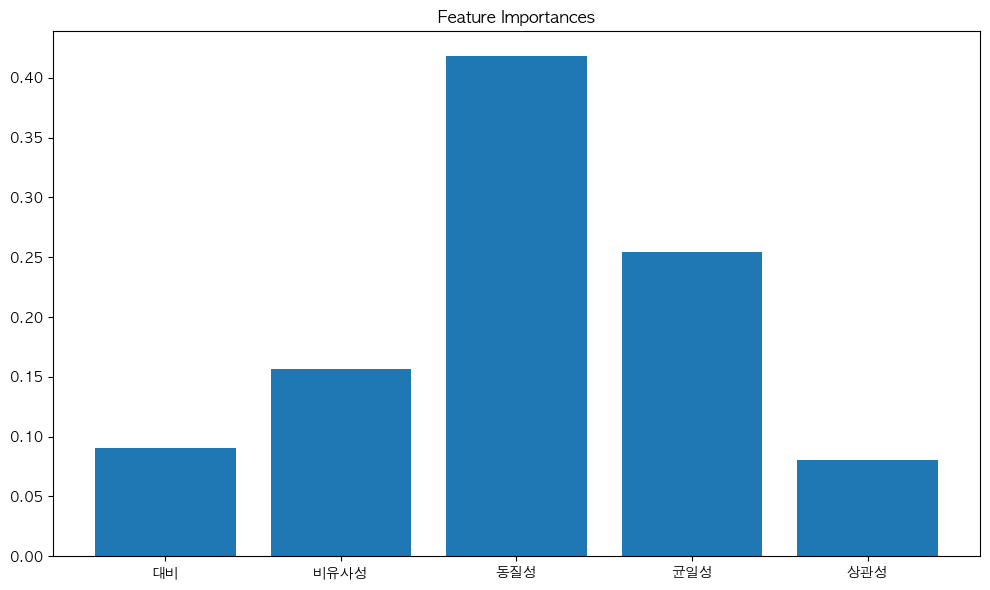

In [33]:
def classify_images_with_all_glcm_std_features(normal_features, crack_features):
    # Prepare the data
    X_normal = np.array(list(zip(*normal_features)))
    X_crack = np.array(list(zip(*crack_features)))
    X = np.vstack((X_normal, X_crack))
    y = np.array([0] * len(X_normal) + [1] * len(X_crack))  # 0 for normal, 1 for crack

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the classifier
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"F1 Score: {f1_score(y_test, y_pred)}", '\n')

    importances = clf.feature_importances_
    feature_names = ['대비', '비유사성', '동질성', '균일성', '상관성']
    feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

    for feature, importance in feature_importance:
        print(f"{feature}: {importance}")

    plt.figure(figsize=(10, 6))
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.bar(range(len(importances)), importances)
    plt.xticks(range(len(importances)), feature_names)
    plt.title("Feature Importances")
    plt.tight_layout()
    plt.show()



# Prepare all GLCM features
normal_features = [normal_glcm_features_std[feature] for feature in normal_glcm_features_std.keys()]
crack_features = [crack_glcm_features_std[feature] for feature in crack_glcm_features_std.keys()]

# Call the function with all GLCM features
classify_images_with_all_glcm_std_features(normal_features, crack_features)


# 결과
- lbp와 glcm의 통계값과 특성들을 활용하여 Randomforest모델을 n_estimator를 10으로 생성하여 F1 score를 비교하였습니다.
- 단일 특성을 사용하였을 떄 가장 좋은 성능을 보여준 것은 GLCM homogeneity의 표준편차를 활용한 모델로 F1 score 약 0.73을 기록하였습니다.
- 여러 특성을 종합하여 사용하였을 때 가장 좋은 성능을 보여준 것은 GLCM 모든 특성의 표준편차를 사용한 모델이었습니다.
  - 이 때 F1 score는 0.9로 측정되었습니다.
  - 이 모델에서 각 특성의 중요도는 동질성 > 균일성 > 비유사성 > 대비 > 상관성 순으로 측정되었습니다.